In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
import pandas as pd
houseprice = pd.read_csv('kc_house_data.csv')


In [3]:
houseprice = houseprice.drop(['id','date','zipcode','lat','long'],axis=1)

In [4]:
houseprice.loc[houseprice['yr_renovated'] > 1,'yr_renovated'] = 1

In [5]:
houseprice.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951             1   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [6]:
houseprice = houseprice.dropna()

In [7]:
houseprice.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
col_names = ['waterfront','view','yr_renovated']

In [9]:
for col in col_names:
    houseprice[col] = houseprice[col].astype('category',copy=False)

In [10]:
houseprice.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [11]:
houseprice_corr = houseprice.corr()

houseprice_corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308366   0.525150     0.702055  0.089661  0.256814   
bedrooms       0.308366  1.000000   0.515974     0.576763  0.031710  0.175418   
bathrooms      0.525150  0.515974   1.000000     0.754684  0.087730  0.500712   
sqft_living    0.702055  0.576763   0.754684     1.000000  0.172841  0.354048   
sqft_lot       0.089661  0.031710   0.087730     0.172841  1.000000 -0.005206   
floors         0.256814  0.175418   0.500712     0.354048 -0.005206  1.000000   
condition      0.036379  0.028433  -0.124917    -0.058689 -0.008951 -0.263808   
grade          0.667434  0.356998   0.664981     0.762727  0.113617  0.458208   
sqft_above     0.605567  0.477616   0.685363     0.876644  0.183511  0.523899   
sqft_basement  0.323842  0.303251   0.283737     0.434925  0.015301 -0.245634   
yr_built       0.054006  0.154248   0.505968     0.318066  0.053061  0.489361   
sqft_living15  0.585377  0.391670   0.568626     0.756440  0.144605  0.279907   
sqft_lot15     0.082448  0.029252   0.087163     0.183301  0.718556 -0.011275   

               condition     grade  sqft_above  sqft_basement  yr_built  \
price           0.036379  0.667434    0.605567       0.323842  0.054006   
bedrooms        0.028433  0.356998    0.477616       0.303251  0.154248   
bathrooms      -0.124917  0.664981    0.685363       0.283737  0.505968   
sqft_living    -0.058689  0.762727    0.876644       0.434925  0.318066   
sqft_lot       -0.008951  0.113617    0.183511       0.015301  0.053061   
floors         -0.263808  0.458208    0.523899      -0.245634  0.489361   
condition       1.000000 -0.144647   -0.158206       0.174273 -0.361384   
grade          -0.144647  1.000000    0.755924       0.168375  0.446958   
sqft_above     -0.158206  0.755924    1.000000      -0.051976  0.423915   
sqft_basement   0.174273  0.168375   -0.051976       1.000000 -0.133195   
yr_built       -0.361384  0.446958    0.423915      -0.133195  1.000000   
sqft_living15  -0.092795  0.713197    0.731871       0.200341  0.326214   
sqft_lot15     -0.003397  0.119243    0.194048       0.017292  0.070936   

               sqft_living15  sqft_lot15  
price               0.585377    0.082448  
bedrooms            0.391670    0.029252  
bathrooms           0.568626    0.087163  
sqft_living         0.756440    0.183301  
sqft_lot            0.144605    0.718556  
floors              0.279907   -0.011275  
condition          -0.092795   -0.003397  
grade               0.713197    0.119243  
sqft_above          0.731871    0.194048  
sqft_basement       0.200341    0.017292  
yr_built            0.326214    0.070936  
sqft_living15       1.000000    0.183188  
sqft_lot15          0.183188    1.000000

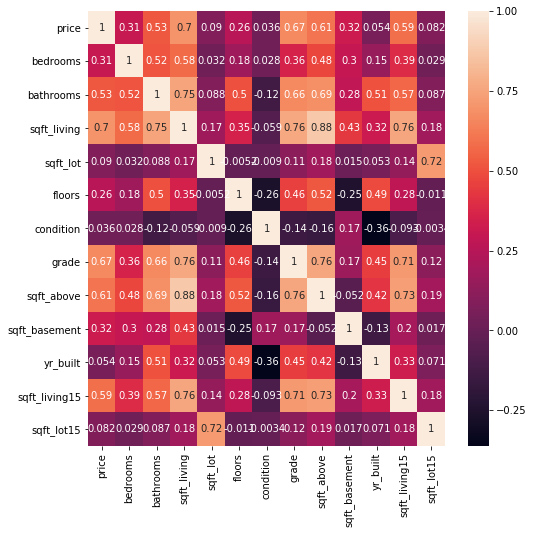

In [12]:
fig, ax =plt.subplots(figsize = (8,8))

sns.heatmap(houseprice_corr, annot=True)
plt.show()

In [13]:
# y values are what we want to predict, in this case the house price

Y = houseprice['price']

In [14]:
X = houseprice.drop('price',axis=1)

In [15]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
x_train,x_test, y_train, y_test = train_test_split(X, Y,test_size=0.4)

In [17]:
x_train.shape, y_train.shape

((12966, 15), (12966,))

In [18]:
x_test.shape, y_test.shape

((8645, 15), (8645,))

In [19]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)# r squared score

0.6450225024239882

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [22]:
reg = LinearRegression()

scores = cross_val_score(reg, X,Y, cv=5, scoring='r2')

In [23]:
scores

array([0.65605518, 0.65077556, 0.64342074, 0.65808578, 0.62575563])

K fold cross validation the training data is split into folds, one fold being used to validate the others used to train.  This is for every canidate model, the average over these runs is used to provide a score that can be compared to other models

In [24]:
from sklearn.model_selection import KFold, cross_val_score

In [25]:
import numpy as np

In [26]:
Y = (np.array(houseprice['price'], dtype='float64')).reshape(-1,1)

In [27]:
X = houseprice.drop('price',axis=1)

X = np.array(X)

In [28]:
X.shape, Y.shape

((21611, 15), (21611, 1))

In [29]:
kf = KFold(n_splits=3)

list(kf.split(X))

[(array([ 7204,  7205,  7206, ..., 21608, 21609, 21610]),
  array([   0,    1,    2, ..., 7201, 7202, 7203])),
 (array([    0,     1,     2, ..., 21608, 21609, 21610]),
  array([ 7204,  7205,  7206, ..., 14405, 14406, 14407])),
 (array([    0,     1,     2, ..., 14405, 14406, 14407]),
  array([14408, 14409, 14410, ..., 21608, 21609, 21610]))]

In [31]:
i = 1

for train, test in kf.split(X):
    print("\nTrain"+ str(i), train)
    print("Test"+ str(i), test)
    
    i+= 1


Train1 [ 7204  7205  7206 ... 21608 21609 21610]
Test1 [   0    1    2 ... 7201 7202 7203]

Train2 [    0     1     2 ... 21608 21609 21610]
Test2 [ 7204  7205  7206 ... 14405 14406 14407]

Train3 [    0     1     2 ... 14405 14406 14407]
Test3 [14408 14409 14410 ... 21608 21609 21610]


In [32]:
len(X),len(train),len(test)

(21611, 14408, 7203)

In [33]:
cross_val_score(reg,X,Y,cv=2)

array([0.64555076, 0.64425186])

In [34]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

Repeated KFold is variatition k fold cv every split repeated a specificed no of times, any results not a fluke

In [35]:
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=0)

list(rkf.split(X))

[(array([    4,     6,    10, ..., 21602, 21604, 21607]),
  array([    0,     1,     2, ..., 21608, 21609, 21610])),
 (array([    0,     1,     2, ..., 21608, 21609, 21610]),
  array([    4,     6,    10, ..., 21602, 21604, 21607])),
 (array([    3,     4,     5, ..., 21606, 21607, 21608]),
  array([    0,     1,     2, ..., 21604, 21609, 21610])),
 (array([    0,     1,     2, ..., 21604, 21609, 21610]),
  array([    3,     4,     5, ..., 21606, 21607, 21608]))]

In [36]:
i = 1

for train, test in rkf.split(X):
    print("\nTrain" + str(i), train)
    print("Test" + str(i), test)
    
    i += 1


Train1 [    4     6    10 ... 21602 21604 21607]
Test1 [    0     1     2 ... 21608 21609 21610]

Train2 [    0     1     2 ... 21608 21609 21610]
Test2 [    4     6    10 ... 21602 21604 21607]

Train3 [    3     4     5 ... 21606 21607 21608]
Test3 [    0     1     2 ... 21604 21609 21610]

Train4 [    0     1     2 ... 21604 21609 21610]
Test4 [    3     4     5 ... 21606 21607 21608]


In [37]:
rkf = RepeatedKFold(n_splits=3, n_repeats=3, random_state=0)
i = 1

for train, test in rkf.split(X):
    print("\nTrain" + str(i), train)
    print("Test" + str(i), test)
    
    i += 1


Train1 [    0     2     3 ... 21607 21609 21610]
Test1 [    1     7     8 ... 21600 21601 21608]

Train2 [    1     4     6 ... 21604 21607 21608]
Test2 [    0     2     3 ... 21606 21609 21610]

Train3 [    0     1     2 ... 21608 21609 21610]
Test3 [    4     6    10 ... 21594 21604 21607]

Train4 [    3     4     5 ... 21607 21608 21609]
Test4 [    0     1     2 ... 21602 21604 21610]

Train5 [    0     1     2 ... 21607 21608 21610]
Test5 [    4     8     9 ... 21600 21601 21609]

Train6 [    0     1     2 ... 21604 21609 21610]
Test6 [    3     5     7 ... 21606 21607 21608]

Train7 [    0     2     4 ... 21606 21609 21610]
Test7 [    1     3     9 ... 21603 21607 21608]

Train8 [    0     1     3 ... 21606 21607 21608]
Test8 [    2     4     8 ... 21605 21609 21610]

Train9 [    1     2     3 ... 21608 21609 21610]
Test9 [    0     5     6 ... 21598 21599 21606]


In [38]:
from sklearn.model_selection import RepeatedKFold, cross_val_score



In [39]:
cancer_df = pd.read_csv('breast-cancer.csv')

In [40]:
cancer_df.sample(10)

Class    Age Menopause Tumor-size inv-nodes node-caps  \
153  no-recurrence-events  60-69      ge40      15-19       0-2        no   
36   no-recurrence-events  50-59      ge40        0-4       0-2        no   
23   no-recurrence-events  50-59   premeno      40-44       0-2        no   
177  no-recurrence-events  60-69      ge40      10-14       0-2        no   
244     recurrence-events  40-49   premeno      30-34     12-14       yes   
124  no-recurrence-events  60-69      ge40      10-14       0-2        no   
259     recurrence-events  50-59      ge40      30-34       3-5        no   
269     recurrence-events  40-49   premeno      25-29       0-2        no   
186  no-recurrence-events  50-59      ge40      25-29       0-2        no   
49   no-recurrence-events  40-49   premeno      20-24       0-2        no   

     deg-malig breast breast-quad irradiat  
153          3  right     left_up      yes  
36           2   left     central       no  
23           2   left     left_up       no  
177          2   left    left_low       no  
244          3   left     left_up      yes  
124          1  right    left_low       no  
259          3  right     left_up       no  
269          2   left    left_low      yes  
186          1   left   right_low       no  
49           1  right    left_low       no